In [1]:
# Standard libraries
from itertools import chain
from ast import literal_eval

# Scientific libraries
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt

# Parallelization library
from joblib import Parallel, delayed

# Utility functions
from helpers.helpers_spotify import get_enao_genre_data
from helpers.helpers_pandas import contains_any

Load the data

In [2]:
tracks_df = pd.read_pickle('../Data/pkl/01_spotify_data_(notna).pkl')

# Import EveryNoise data

  
<img src="../Images/Enao-genres-map.jpg" alt="Every Noise" style="height: 1000px;"/>

## Get smilar Genres

### scrapper for *genremap*

Goes to the website and enters each genre link and scraps the html. Grabs the related genres, opposite genres, and uses the font size for each as a  indicator of edge 'weight'. Also gets the Spotify playlist links.

Source:
- [https://github.com/sofielange98/every-noise-network-analysis](https://github.com/sofielange98/every-noise-network-analysis)
- [https://github.com/aweitz/EveryNoise](https://github.com/aweitz/EveryNoise)

In [3]:
def genre_scraper(genres):
    """Scrap EveryNoise data associated to a list of genres.

    Args:
        genres (list): list of genres for which to scrap ENAO data

    Returns:
        pd.DataFrame: the info scrapped for each genre, organized in a DF
    """
    if isinstance(genres, str):
        genres = [genres]
    genres_data = Parallel(n_jobs=-1)(delayed(get_enao_genre_data)(genre) for genre in genres)
    return pd.DataFrame(genres_data)

In [4]:
# Print unique genres count and list of genres
my_unique_genres = list(set(chain.from_iterable(tracks_df['genres'].to_list())))
print(f"The spotify data includes {len(my_unique_genres)} different genres:")
my_unique_genres

The spotify data includes 973 different genres:


['folclor colombiano',
 'cante flamenco',
 'traprun',
 'rock',
 'dutch hip hop',
 'italian lounge',
 'flamenco',
 'turkish alt pop',
 'glitch hop',
 'instrumental soul',
 'indie soul',
 'medieval folk',
 'deep house',
 'collage pop',
 'burkinabe traditional',
 'bass trap',
 'son cubano',
 'musica infantil',
 'swiss house',
 'modern bollywood',
 'hurdy-gurdy',
 'wassoulou',
 'tuvan folk',
 'dub techno',
 'cuban rumba',
 'bboy',
 'west african jazz',
 'mbira',
 'gnawa',
 'leipzig electronic',
 'reggaeton flow',
 'downtempo bass',
 'french pop',
 'arab alternative',
 'gothic americana',
 'new french touch',
 'dark disco',
 'melancholia',
 'south african electronic',
 'nordnorsk musikk',
 'hamburg electronic',
 'psychedelic soul',
 'canadian latin',
 'xhosa',
 'hip-hop experimental',
 'mambo',
 'electronica venezuela',
 'r&b en espanol',
 'uk experimental electronic',
 'experimental house',
 'russian alternative rock',
 'escape room',
 'jazz cubano',
 'uk contemporary jazz',
 'emo punk',
 

In [5]:
# Extract ENAO data for each genre
genre_info_df = genre_scraper(my_unique_genres)
genre_info_df

,genre,sim_genres,sim_weights,opp_genres,opp_weights,main_artists,artists_weights,spotify_url
0,folclor colombiano,"[musica andina colombiana, classic colombian p...","[118, 118, 102, 100, 116, 116, 111, 100, 100, ...","[deep space rock, progressive metal, polish no...","[107, 109, 101, 121, 119, 115, 101, 160, 100, ...","[JosÃ© A. Morales, Los Filipichines, Los Jeroc...","[105, 105, 101, 104, 104, 102, 159, 100, 108, ...",https://open.spotify.com/playlist/0XsYSjgy8rwn...
1,cante flamenco,"[vintage hollywood, tango cancion, nuevo flame...","[100, 102, 122, 101, 100, 107, 101, 103, 129, ...","[aggrotech, industrial metal, j-core, electron...","[149, 130, 112, 126, 136, 111, 137, 152, 125, ...","[Hermanos Toronjo, PericÃ³n de CÃ¡diz, Enrique...","[102, 104, 103, 108, 110, 113, 100, 102, 102, ...",https://open.spotify.com/playlist/7mDcvRe9hX5X...
2,traprun,"[russian trap metal, future bass, electronica ...","[100, 111, 103, 100, 107, 107, 100, 103, 131, ...","[song poem, egyptian traditional, musica andin...","[160, 105, 145, 123, 147, 112, 136, 101, 121, ...","[Marc Madness, MELRAAH, Delp, Bodykit, Jinco, ...","[105, 100, 101, 104, 109, 115, 153, 112, 107, ...",https://open.spotify.com/playlist/0cD79tL7mj2p...
3,rock,"[dance rock, glam rock, soft rock, jangle pop,...","[101, 112, 117, 102, 108, 101, 110, 102, 113, ...","[lithuanian folk, baltic folk, lo-fi chill, in...","[144, 102, 116, 132, 108, 100, 105, 118, 102, ...","[Machine Head, System Of A Down, 10cc, Alter B...","[107, 126, 107, 108, 111, 109, 108, 109, 111, ...",https://open.spotify.com/playlist/7dowgSWOmvdp...
4,dutch hip hop,"[rap maromba, shatta, argentine hip hop, nz ga...","[100, 100, 100, 101, 101, 100, 133, 101, 101, ...","[canadian post-rock, bagpipe marching band, ca...","[115, 148, 106, 123, 103, 160, 104, 107, 126, ...","[Frenchie B, Winne, Aim, Karma K, Rafello, Rab...","[102, 111, 108, 110, 104, 102, 106, 107, 101, ...",https://open.spotify.com/playlist/6BXgKjKKHLt6...
...,...,...,...,...,...,...,...,...
968,electro,"[broken beat, harlem hip hop, italo house, har...","[102, 107, 100, 107, 115, 101, 118, 111, 111, ...","[clap and tap, scottish smallpipe, free folk, ...","[160, 153, 101, 105, 126, 137, 100, 100, 130, ...","[Alden Tyrell, Luke Eargoggle, Trouble Funk, T...","[100, 100, 101, 100, 101, 101, 101, 106, 100, ...",https://open.spotify.com/playlist/4oBAlPMMM8Hq...
969,cape verdean folk,"[musique traditionnelle comorienne, nova mpb, ...","[100, 100, 102, 100, 100, 128, 102, 105, 102, ...","[post-punk latinoamericano, slovenian indie, s...","[118, 131, 116, 110, 113, 110, 104, 107, 118, ...","[Tchota Suari, Simentera, Teofilo Chantre, Tot...","[100, 104, 110, 100, 100, 100, 100, 100, 100, ...",https://open.spotify.com/playlist/1TrGj5eL5I87...
970,spanish jazz,"[piano mpb, jazz double bass, australian jazz,...","[101, 102, 102, 104, 105, 104, 100, 101, 104, ...","[neue deutsche harte, j-pop boy group, j-divis...","[107, 117, 109, 133, 114, 105, 106, 110, 127, ...","[Joan Chamorro, Tete Montoliu, Rycardo Moreno,...","[160, 115, 105, 101, 112, 122, 100, 107, 101, ...",https://open.spotify.com/playlist/4sff5BasdWwx...
971,abstract hip hop,"[maine hip hop, antiviral pop, escape room, un...","[102, 100, 100, 124, 104, 110, 105, 101, 103, ...","[small room, tavern, alandsk musik, isle of ma...","[147, 140, 132, 122, 111, 140, 121, 120, 119, ...","[Dem Atlas, Cool Calm Pete, Sapient, Oddateee,...","[106, 103, 102, 100, 112, 104, 104, 102, 100, ...",https://open.spotify.com/playlist/6R9oHYFwTr01...


In [6]:
# check that every genre has been scrapped
if len(genre_info_df) != len(my_unique_genres):
    raise ValueError("Some genres were not found")

### Check for incomplete data

In [7]:
# Check which genres do not have similar genres associated
no_sim_genres = ~genre_info_df['sim_genres'].astype(bool)
genre_info_df[no_sim_genres]

,genre,sim_genres,sim_weights,opp_genres,opp_weights,main_artists,artists_weights,spotify_url
262,classical organ,[],[],"[ragga jungle, trival, italo dance, jersey clu...","[122, 101, 109, 110, 101, 102, 110, 143, 160, ...","[Flor Peeters, Rosalinde Haas, Gunther Rost, F...","[101, 100, 101, 106, 101, 103, 102, 108, 102, ...",https://open.spotify.com/playlist/56PPF7Jg6OuD...
513,rominimal,[],[],"[police band, scottish smallpipe, zampogna, po...","[129, 130, 138, 117, 107, 110, 106, 100, 137, ...","[Lowris, Priku, Melle-J, Silat Beksi, Anam Nes...","[105, 125, 101, 120, 102, 100, 114, 111, 103, ...",https://open.spotify.com/playlist/6tbzdys5a2LP...


In [8]:
# Collect genres that do not have similar genres associated
genres_wihout_sim_genres = genre_info_df[no_sim_genres]['genre'].to_list()
genres_wihout_sim_genres

['classical organ', 'rominimal']

In [9]:
# Check which tracks are associated with those genres
tracks_df[contains_any(tracks_df['genres'], genres_wihout_sim_genres)]

,spotify_id,title,artists,artists_id,genres,popularity,energy,valence,danceability,acousticness,loudness,speechiness,instrumentalness,liveness,tempo,key,mode,time_signature,duration_ms
1796,1iUpKFWs8Uskzc1VXhLdLk,The Lament for Ten (People),[Cunla],[2E5WOH3t67FGeRjJcjkhZc],"[alternative roots rock, anglican liturgy, bag...",0,0.0391,0.405,0.173,0.99600,-15.739,0.0356,0.925,0.1170,66.656,5,0,5,216450
1854,7fbHdEoEiGFaQW8VtZKd4S,Don't Let Go,[Markus Homm],[6lU2Le0VfhyLnb8x0bOqil],"[minimal tech house, rominimal]",6,0.4940,0.316,0.808,0.00857,-15.485,0.0622,0.647,0.0363,124.001,11,0,4,373722


In [10]:
# approximate similar genres 
for val in genres_wihout_sim_genres:
    mask = contains_any(tracks_df['genres'], val)  # tracks associated with this genre in out spotify liked songs
    lst = tracks_df[mask]['genres'].to_list()      # get +/- similar genres
    sim_genres = set(chain(*lst))           # flatten sim genres list
    sim_genres.discard(val)                 # discard the genre itself
    print(f"Similar to {val}: {list(sim_genres)}")
    idx = genre_info_df.index[genre_info_df['genre'] == val].tolist()  # find this genre back in ENAO df
    if len(idx) != 1:                       # there should be only one row 
        raise ValueError(f"Error! Non unique row with genre {val} (found at {idx})")
    genre_info_df.at[idx[0], 'sim_genres'] = list(sim_genres)            # replace sim_genres by approximation
    genre_info_df.at[idx[0], 'sim_weights'] = [100] * len(sim_genres)    # default value of sim_weights = 100

Similar to classical organ: ['italian classical guitar', 'irish folk', 'shanty', 'celtic harp', 'anglican liturgy', 'alternative roots rock', 'breton folk', 'scottish smallpipe', 'uilleann pipes', 'chanson paillarde', 'flemish folk', 'classical guitar', 'bagpipe', 'string folk', 'contrabass', 'celtic', 'police band', 'bagpipe marching band', 'spanish jazz', 'fingerstyle']
Similar to rominimal: ['minimal tech house']


In [11]:
# Double check that it was replaced properly
genre_info_df[no_sim_genres]

,genre,sim_genres,sim_weights,opp_genres,opp_weights,main_artists,artists_weights,spotify_url
262,classical organ,"[italian classical guitar, irish folk, shanty,...","[100, 100, 100, 100, 100, 100, 100, 100, 100, ...","[ragga jungle, trival, italo dance, jersey clu...","[122, 101, 109, 110, 101, 102, 110, 143, 160, ...","[Flor Peeters, Rosalinde Haas, Gunther Rost, F...","[101, 100, 101, 106, 101, 103, 102, 108, 102, ...",https://open.spotify.com/playlist/56PPF7Jg6OuD...
513,rominimal,[minimal tech house],[100],"[police band, scottish smallpipe, zampogna, po...","[129, 130, 138, 117, 107, 110, 106, 100, 137, ...","[Lowris, Priku, Melle-J, Silat Beksi, Anam Nes...","[105, 125, 101, 120, 102, 100, 114, 111, 103, ...",https://open.spotify.com/playlist/6tbzdys5a2LP...


In [12]:
# Check if we still have missing data
if genre_info_df['sim_genres'].astype(bool).any() == False:
    raise ValueError("Some similar genres are still missing")

## Get genre position from ENAO map

In [13]:
# download latest genre map from https://github.com/ben-tanen/spotify-genre-map/tree/master/data
# make sure to click on 'raw' button, before copying the URL
url = 'https://raw.githubusercontent.com/ben-tanen/spotify-genre-map/master/data/enao-genres-20220402.csv'
genre_info_df_position = pd.read_csv(url)

In [14]:
# Extract position from the dataframe
genre_info_df_position.drop(columns=genre_info_df_position.columns.difference(['genre', 'top', 'left', 'color']), inplace=True)
# for dim in ['top', 'left']: 
#     genre_info_df_position['top'] = genre_info_df_position['top'].str[:-2].astype(int).rename('y')    # remove px + convert to int

# Convert pixel positions to integers
genre_info_df_position['x'] = genre_info_df_position['left'].str[:-2].astype(int)
genre_info_df_position['y'] = genre_info_df_position['top'].str[:-2].astype(int)
# Invert the y-axis to match the image coordinate system
genre_info_df_position['y'] = genre_info_df_position['y'].max() - genre_info_df_position['y']
# Convert color values from string to array of floats
genre_info_df_position['color'] = genre_info_df_position['color'].str[3:].apply(lambda x: array(literal_eval(str(x))) / 255)
# Remove 'top' and 'left' columns, which are no longer needed
genre_info_df_position.drop(columns=['top', 'left'], inplace=True)
# Show the resulting dataframe
genre_info_df_position.head()

,genre,color,x,y
0,rap tico,"[0.6941176470588235, 0.5294117647058824, 0.133...",1110,11820
1,lovers rock,"[0.5568627450980392, 0.5686274509803921, 0.050...",1180,14390
2,progressive uplifting trance,"[0.8862745098039215, 0.45098039215686275, 0.62...",525,19699
3,kompa chretien,"[0.6509803921568628, 0.5490196078431373, 0.047...",733,13041
4,piano blues,"[0.4, 0.5333333333333333, 0.17647058823529413]",920,4116


In [15]:
# Only keep the genres that are present in our spotify liked songs
mask = genre_info_df_position['genre'].isin(my_unique_genres)
position_dct = genre_info_df_position[mask].set_index('genre').to_dict()
position_dct

{'color': {'lovers rock': array([0.55686275, 0.56862745, 0.05098039]),
  'folk rock italiano': array([0.51764706, 0.54117647, 0.04313725]),
  'cha-cha-cha': array([0.49803922, 0.52156863, 0.24313725]),
  'blues': array([0.41176471, 0.5254902 , 0.12941176]),
  'jam band': array([0.60784314, 0.49411765, 0.23137255]),
  'musica afroperuana': array([0.56470588, 0.54117647, 0.10980392]),
  'musica indigena latinoamericana': array([0.56470588, 0.56078431, 0.05490196]),
  'rap latina': array([0.6745098 , 0.56078431, 0.02352941]),
  'contemporary vocal jazz': array([0.2745098 , 0.60392157, 0.04705882]),
  'fingerstyle': array([0.29803922, 0.65882353, 0.69411765]),
  'mambo': array([0.54901961, 0.50196078, 0.27058824]),
  'dutch classical piano': array([0.13333333, 0.64313725, 0.85490196]),
  'malagasy folk': array([0.55294118, 0.5372549 , 0.17254902]),
  'ecuadorian pop': array([0.65882353, 0.55294118, 0.01960784]),
  'venda pop': array([0.62745098, 0.56470588, 0.06666667]),
  'reggae en espan

In [16]:
# Add columns "x" and "y" in ou ENAO df
for col in ['x', 'y', 'color']:
    genre_info_df[col] = genre_info_df['genre'].map(position_dct[col])
genre_info_df

,genre,sim_genres,sim_weights,opp_genres,opp_weights,main_artists,artists_weights,spotify_url,x,y,color
0,folclor colombiano,"[musica andina colombiana, classic colombian p...","[118, 118, 102, 100, 116, 116, 111, 100, 100, ...","[deep space rock, progressive metal, polish no...","[107, 109, 101, 121, 119, 115, 101, 160, 100, ...","[JosÃ© A. Morales, Los Filipichines, Los Jeroc...","[105, 105, 101, 104, 104, 102, 159, 100, 108, ...",https://open.spotify.com/playlist/0XsYSjgy8rwn...,1092.0,8920.0,"[0.5490196078431373, 0.5843137254901961, 0.121..."
1,cante flamenco,"[vintage hollywood, tango cancion, nuevo flame...","[100, 102, 122, 101, 100, 107, 101, 103, 129, ...","[aggrotech, industrial metal, j-core, electron...","[149, 130, 112, 126, 136, 111, 137, 152, 125, ...","[Hermanos Toronjo, PericÃ³n de CÃ¡diz, Enrique...","[102, 104, 103, 108, 110, 113, 100, 102, 102, ...",https://open.spotify.com/playlist/7mDcvRe9hX5X...,865.0,2533.0,"[0.35294117647058826, 0.5764705882352941, 0.11..."
2,traprun,"[russian trap metal, future bass, electronica ...","[100, 111, 103, 100, 107, 107, 100, 103, 131, ...","[song poem, egyptian traditional, musica andin...","[160, 105, 145, 123, 147, 112, 136, 101, 121, ...","[Marc Madness, MELRAAH, Delp, Bodykit, Jinco, ...","[105, 100, 101, 104, 109, 115, 153, 112, 107, ...",https://open.spotify.com/playlist/0cD79tL7mj2p...,755.0,17547.0,"[0.7372549019607844, 0.5490196078431373, 0.298..."
3,rock,"[dance rock, glam rock, soft rock, jangle pop,...","[101, 112, 117, 102, 108, 101, 110, 102, 113, ...","[lithuanian folk, baltic folk, lo-fi chill, in...","[144, 102, 116, 132, 108, 100, 105, 118, 102, ...","[Machine Head, System Of A Down, 10cc, Alter B...","[107, 126, 107, 108, 111, 109, 108, 109, 111, ...",https://open.spotify.com/playlist/7dowgSWOmvdp...,497.0,10978.0,"[0.6980392156862745, 0.4392156862745098, 0.113..."
4,dutch hip hop,"[rap maromba, shatta, argentine hip hop, nz ga...","[100, 100, 100, 101, 101, 100, 133, 101, 101, ...","[canadian post-rock, bagpipe marching band, ca...","[115, 148, 106, 123, 103, 160, 104, 107, 126, ...","[Frenchie B, Winne, Aim, Karma K, Rafello, Rab...","[102, 111, 108, 110, 104, 102, 106, 107, 101, ...",https://open.spotify.com/playlist/6BXgKjKKHLt6...,1116.0,14628.0,"[0.6509803921568628, 0.5490196078431373, 0.050..."
...,...,...,...,...,...,...,...,...,...,...,...
968,electro,"[broken beat, harlem hip hop, italo house, har...","[102, 107, 100, 107, 115, 101, 118, 111, 111, ...","[clap and tap, scottish smallpipe, free folk, ...","[160, 153, 101, 105, 126, 137, 100, 100, 130, ...","[Alden Tyrell, Luke Eargoggle, Trouble Funk, T...","[100, 100, 101, 100, 101, 101, 101, 106, 100, ...",https://open.spotify.com/playlist/4oBAlPMMM8Hq...,1190.0,18685.0,"[0.6862745098039216, 0.47843137254901963, 0.35..."
969,cape verdean folk,"[musique traditionnelle comorienne, nova mpb, ...","[100, 100, 102, 100, 100, 128, 102, 105, 102, ...","[post-punk latinoamericano, slovenian indie, s...","[118, 131, 116, 110, 113, 110, 104, 107, 118, ...","[Tchota Suari, Simentera, Teofilo Chantre, Tot...","[100, 104, 110, 100, 100, 100, 100, 100, 100, ...",https://open.spotify.com/playlist/1TrGj5eL5I87...,863.0,8440.0,"[0.5294117647058824, 0.5607843137254902, 0.035..."
970,spanish jazz,"[piano mpb, jazz double bass, australian jazz,...","[101, 102, 102, 104, 105, 104, 100, 101, 104, ...","[neue deutsche harte, j-pop boy group, j-divis...","[107, 117, 109, 133, 114, 105, 106, 110, 127, ...","[Joan Chamorro, Tete Montoliu, Rycardo Moreno,...","[160, 115, 105, 101, 112, 122, 100, 107, 101, ...",https://open.spotify.com/playlist/4sff5BasdWwx...,855.0,3661.0,"[0.3607843137254902, 0.596078431372549, 0.4980..."
971,abstract hip hop,"[maine hip hop, antiviral pop, escape room, un...","[102, 100, 100, 124, 104, 110, 105, 101, 103, ...","[small room, tavern, alandsk musik, isle of ma...","[147, 140, 132, 122, 111, 140, 121, 120, 119, ...","[Dem Atlas, Cool Calm Pete, Sapient, Oddateee,...","[106, 103, 102, 100, 

In [18]:
# Sanity check
mask = genre_info_df.isna().any(axis=1)
genre_info_df[mask][['genre', 'x', 'y', 'color']]

,genre,x,y,color
212,bossbeat,NaN,NaN,NaN
351,spectra,NaN,NaN,NaN
484,handpan,NaN,NaN,NaN
840,writing,NaN,NaN,NaN
943,urbano mexicano,NaN,NaN,NaN


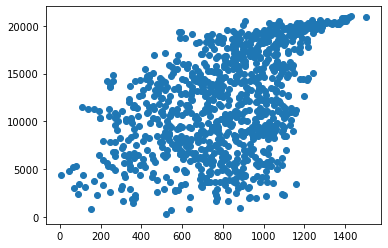

In [19]:
# Plot the x,y coordinates for every genres in genre_info_df
fig, ax = plt.subplots()
ax.scatter(genre_info_df['x'], genre_info_df['y'])
plt.show()

## Save the results

In [20]:
# Save the data
genre_info_df.to_pickle('../Data/pkl/02_everynoise_data.pkl')
genre_info_df.to_csv('../Data/csv/02_everynoise_data.csv')  # For visualization